# Importação de Bibliotecas

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer # Bag-of-words
from sklearn.feature_extraction.text import TfidfVectorizer # TF-idf
import wordcloud
from wordcloud import WordCloud

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/BEPE/datasets/all_replies_goEmotions.csv')

In [4]:
try:
  df.drop(columns=['Unnamed: 0'], inplace=True)
except KeyError:
  pass
df.head(5)

,tweet_id,created_at,timestamp_ms,tweet_text,id_tweet_reply,predictions,scores
0,1246155262374957058,Fri Apr 03 19:19:01 +0000 2020,1585941541652,"No vídeo, 6:30 - 6:40, fala que vai sancionar...",1244963529377153024,neutro,0.780009
1,1246165338254979077,Fri Apr 03 19:59:03 +0000 2020,1585943943929,Já viu isso Sr° Presidente?,1244963529377153024,curiosidade,0.754949
2,1246257392150552580,Sat Apr 04 02:04:51 +0000 2020,1585965891288,A população que nunca sai daí né? Mesmo reban...,1244963529377153024,raiva,0.304363
3,1245329530476257280,Wed Apr 01 12:37:51 +0000 2020,1585744671826,Você é louco. Se não fosse a atitude firme do...,1244963529377153024,raiva,0.488081
4,1245331502214283264,Wed Apr 01 12:45:41 +0000 2020,1585745141925,Quem te segue é mais bandido que tu .,1244963529377153024,neutro,0.297641


In [5]:
df.describe()

,tweet_id,timestamp_ms,id_tweet_reply,scores
count,4.971545e+06,4.971545e+06,4.971545e+06,4.971545e+06
mean,1.351660e+18,1.611096e+12,1.351324e+18,5.796484e-01
std,8.232556e+16,1.962794e+10,8.234079e+16,2.264475e-01
min,1.244964e+18,1.585657e+12,1.244964e+18,8.441830e-02
25%,1.275935e+18,1.593042e+12,1.275476e+18,3.914878e-01
50%,1.333870e+18,1.606854e+12,1.332646e+18,5.595520e-01
75%,1.413802e+18,1.625912e+12,1.413257e+18,7.525657e-01
max,1.531063e+18,1.653869e+12,1.530994e+18,9.962011e-01


# Countplot

In [6]:
cor = 'turbo'
style = 'whitegrid'
sns.set_theme(style=style, palette=cor)

In [7]:
def plot_countplot(coluna, bins, labels):
  bins_coluna = pd.cut(x=coluna, bins=bins, labels=labels)
  plt.figure(figsize=(8, 4))
  sns.countplot(x=bins_coluna, palette=cor)

In [8]:
emocoes = set(df['predictions'])
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']

raiva
admiração
curiosidade


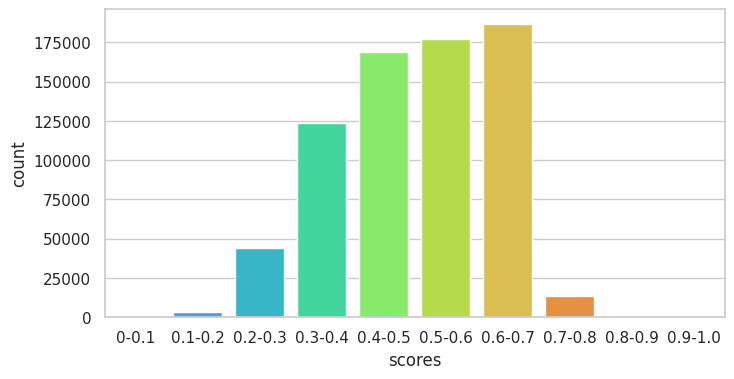

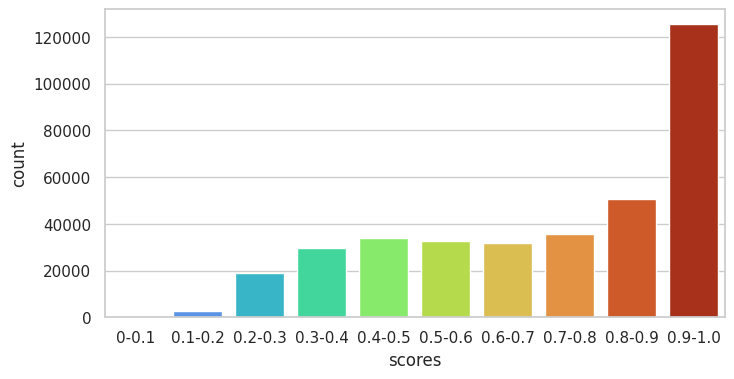

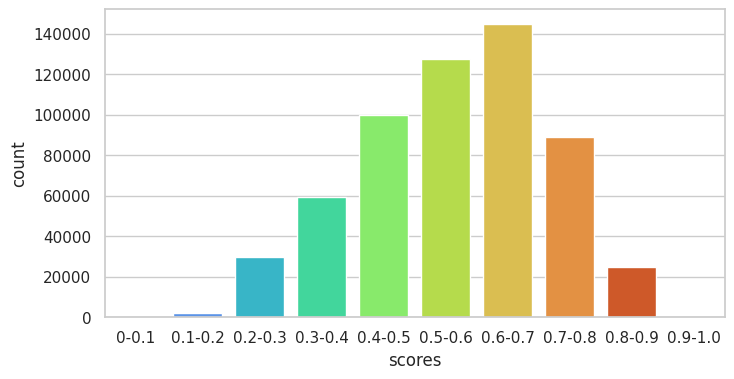

In [9]:
for emocao in ['raiva', 'admiração', 'curiosidade']:
  print(emocao)
  coluna = df[df['predictions'] == emocao]['scores']
  plot_countplot(coluna, bins, labels)

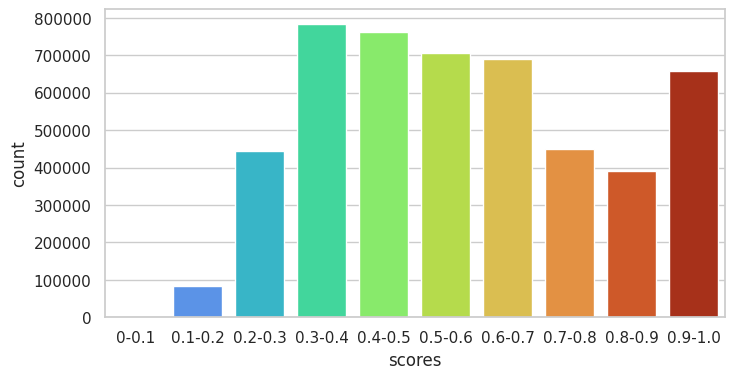

In [10]:
plot_countplot(df['scores'], bins, labels)

# Quantidade de instancias

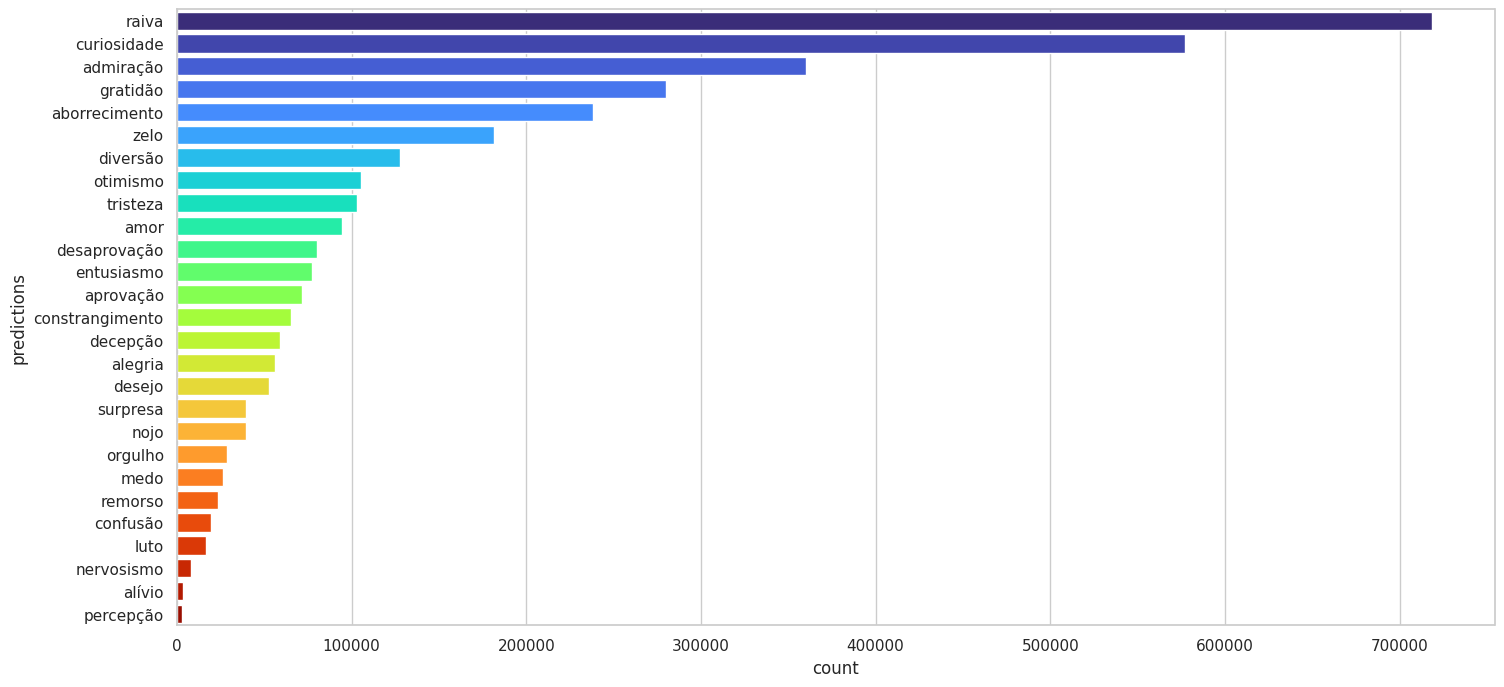

In [11]:
o = ['percepção', 'alívio', 'nervosismo', 'luto', 'confusão', 'remorso', 'medo', 'orgulho', 'nojo', 'surpresa', 'desejo', 'alegria', 'decepção', 'constrangimento', 'aprovação', 'entusiasmo', 'desaprovação', 'amor', 'tristeza', 'otimismo', 'diversão', 'zelo', 'aborrecimento', 'gratidão', 'admiração', 'curiosidade', 'raiva']
o.reverse()
plt.figure(figsize=(17, 8))
sns.countplot(y=df['predictions'], order=o, palette=cor, saturation=1)
plt.show()

# Boxplot

In [12]:
df_cp = df.copy()
df_cp.drop(columns=['tweet_id', 'created_at', 'timestamp_ms', 'tweet_text', 'id_tweet_reply'], inplace=True)
df_cp

,predictions,scores
0,neutro,0.780009
1,curiosidade,0.754949
2,raiva,0.304363
3,raiva,0.488081
4,neutro,0.297641
...,...,...
4971540,neutro,0.979324
4971541,gratidão,0.988564
4971542,decepção,0.228815
4971543,zelo,0.792229


In [13]:
def get_data(emocao):
  data = list(df[df['predictions'] == emocao]['scores'])
  return data

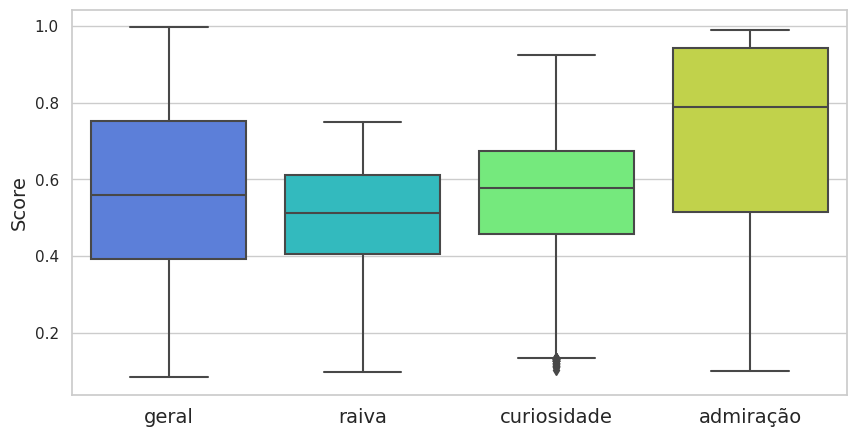

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
all_data = []
all_data.append(list((df['scores'])))
for emocao in ['raiva', 'curiosidade', 'admiração']:
  data = get_data(emocao)
  all_data.append(data)
ax = sns.boxplot(data=all_data)
plt.xticks([0, 1, 2, 3], ['geral', 'raiva', 'curiosidade', 'admiração'], fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.show()

# Top Palavras

In [15]:
df_p = pd.read_csv('/content/drive/MyDrive/BEPE/datasets/all_replies_goEmotions_clean.csv')

In [16]:
df_p.head(5)

,Unnamed: 0,tweet_id,created_at,timestamp_ms,tweet_text,id_tweet_reply,predictions,scores
0,0,1246155262374957058,Fri Apr 03 19:19:01 +0000 2020,1585941541652,vídeo fala sancionar necessitados agora nada,1244963529377153024,neutro,0.780009
1,1,1246165338254979077,Fri Apr 03 19:59:03 +0000 2020,1585943943929,viu sr° presidente,1244963529377153024,curiosidade,0.754949
2,2,1246257392150552580,Sat Apr 04 02:04:51 +0000 2020,1585965891288,população nunca sai daí rebanho idiotas vcs pa...,1244963529377153024,raiva,0.304363
3,3,1245329530476257280,Wed Apr 01 12:37:51 +0000 2020,1585744671826,louco atitude firme ministro mandetta empurrad...,1244963529377153024,raiva,0.488081
4,4,1245331502214283264,Wed Apr 01 12:45:41 +0000 2020,1585745141925,segue bandido,1244963529377153024,neutro,0.297641


In [17]:
new_tt = []
for tweet in df_p['tweet_text']:
  if type(tweet) != str:
    new_tt.append('')
  else:
    new_tt.append(tweet)

df_p['tweet_text'] = new_tt

In [18]:
def bow(data):
  vec = CountVectorizer().fit(data)
  bag_of_words = vec.transform(data).toarray()
  return bag_of_words

In [19]:
def get_top_n_words(df, emocao='all', n=None, to_print=True):
    if emocao == 'all':
      data = df['tweet_text']
    else:
      data = df[df['predictions'] == emocao]['tweet_text']

    vec = CountVectorizer().fit(data)
    bag_of_words = vec.transform(data)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    if to_print:
      for word, freq in words_freq[:n]:
        print(word, freq)
    else:
      return words_freq[:n]

In [20]:
get_top_n_words(df_p, 'raiva', 11)

vc 99065
presidente 85844
merda 65233
cu 53771
puta 52690
bolsonaro 50959
vagabundo 46538
povo 45397
porra 42760
filho 41485
genocida 41479


In [21]:
get_top_n_words(df_p, 'curiosidade', 11)

presidente 122234
mil 60297
queiroz 58891
esposa 47791
vc 47772
recebeu 45796
michelle 41437
senhor 39104
fabrício 35811
bolsonaro 35766
mery 29528


In [22]:
get_top_n_words(df_p, 'admiração', 11)

presidente 169245
parabéns 73624
brasil 50141
bom 43834
melhor 42329
deus 36327
bolsonaro 33218
boa 30419
senhor 30064
povo 25441
todos 21901


In [23]:
get_top_n_words(df_p, 'all', 11)

presidente 1126338
vc 390690
bolsonaro 373498
brasil 343475
deus 322330
povo 261984
dia 256013
senhor 253754
bom 215345
parabéns 209108
governo 157949


# Nuvem de palavras

In [24]:
def nuvem_palavras(emocao, df):
  df_emocao = df[df['predictions'] == emocao]['tweet_text']
  all_emocao = ' '.join(df_emocao)
  wordcloud = WordCloud(stopwords=('vc'),
                        background_color="white",
                        width=5000, height=1500).generate(all_emocao)

  # mostrar a imagem final
  fig, ax = plt.subplots(figsize=(10,6))
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.set_axis_off()
  plt.imshow(wordcloud)

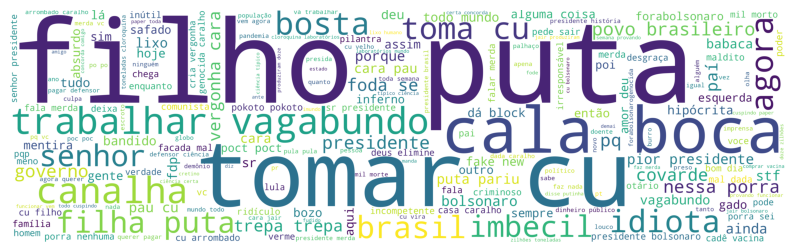

In [25]:
nuvem_palavras('raiva', df_p)

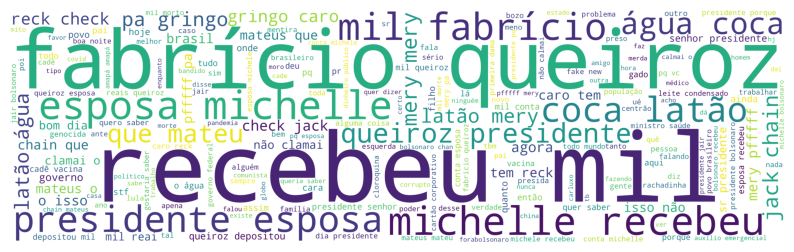

In [26]:
nuvem_palavras('curiosidade', df_p)

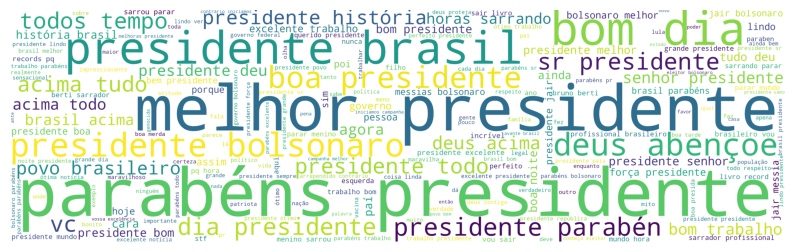

In [27]:
nuvem_palavras('admiração', df_p)